# Data Visualisation

>This material is an adaptation of the [Plot With Pandas: Python Data Visualization for Beginners](https://realpython.com/pandas-plot-python/) tutorial developed by Reka Hovath in the Real Python website.


Whether you are getting to know a dataset or preparing to publish your findings, visualisation is an essential tool. 

The popular Python Pandas data analysis library offers several different options for visualising your data with `.plot()`. 

Even if you're at the beginning of your Pandas journey, you'll soon be creating basic plots that will produce valuable information about your data.

## Preparations
First, download the data by passing the download URL to `pandas.read_csv()`:

In [46]:
import pandas as pd

download_url = "https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv"
df = pd.read_csv(download_url)
df

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,5043,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,1848,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,1724,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,3154,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


Now that you have a DataFrame, you can take a look at the data. First, you need to set the display.max.columns option to make sure that pandas doesn't hide any columns. 

In [3]:
pd.set_option("display.max.columns", None)
df.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


## Create your first visualisation with Pandas
The dataset contains some columns related to the earnings of graduates in each specialisation:

- "Median" is the median earnings of full-time workers over the entire year.
- "P25th" is the 25th percentile of earnings.
- P75th" is the 75th percentile of earnings.
- Rank" is the ranking of the specialty by median earnings.

Let's start with a plot showing these columns. You can do this with `.plot()`:

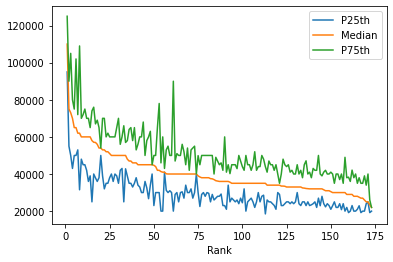

In [7]:
df.plot(x="Rank", y=["P25th", "Median", "P75th"]);

`.plot()` returns a line graph containing the data for each row in the DataFrame. The values on the x-axis represent the ranking of each institution, and the "P25th", "Median" and "P75th" values are plotted on the y-axis. Looking at the graph you can make the following observations:

- The median income decreases as the ranking decreases. This is expected because ranking is determined by median income.
- Some degrees have large gaps between the 25th and 75th percentiles. People with these degrees may earn significantly less or significantly more than the median income.
- Other careers have very small gaps between the 25th and 75th percentiles. People with these degrees earn salaries very close to the median income.

Your first visualisation already hints that there is much more to discover in the data! Some careers have a wide range of earnings and others have a rather narrow range. To discover these differences, you will use several other types of graphs.

`.plot()` has several optional parameters. In particular, the `kind` parameter accepts eleven different string values and determines what type of plot it will create:

- `area` is for area plots.
- `bar` is for vertical bar charts.
- `barh` is for horizontal bar charts.
- `box` is for box plots.
- `hexbin` is for hexbin plots.
-`hist` is for histograms.
- `kde` is for kernel density estimation plots.
- `density` is an alias for "kde".
-`line` is for line charts.
- `pie` is for pie charts.
- `scatter` is for scatter plots.

Now try adding the `kind` argument for the same graph, using the `box`, `hist` and `density` parameters:

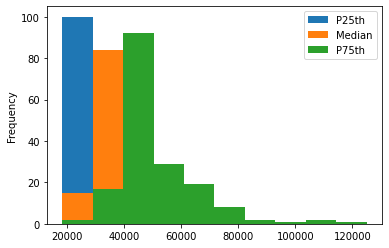

In [13]:
df.plot(x="Rank", y=["P25th", "Median", "P75th"], kind="hist");

If you do not provide `x` and `y` parameters to `.plot()`, then it creates a line plot with the index on the X-axis and all numeric columns on the Y-axis. 

While this is a useful default for datasets with only a few columns, for the college majors dataset and its several numeric columns, it looks like a disaster.

Try it under your own risk:

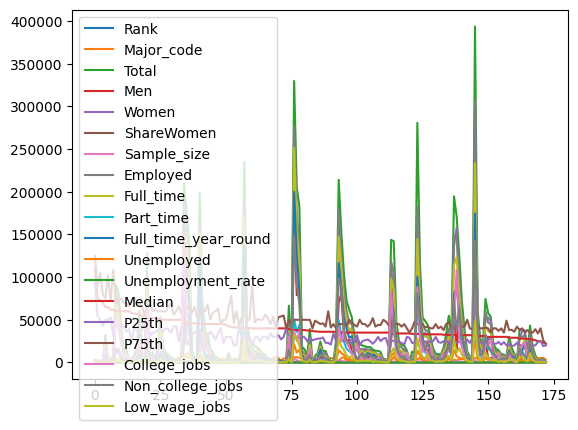

In [5]:
df.plot(kind="line");

## Look under the hood: Matplotlib

When you call `.plot()` on a DataFrame object, Matplotlib creates the plot under the hood.

To verify this, try two code snippets. 

First, create a graph with Matplotlib using two columns of your DataFrame:

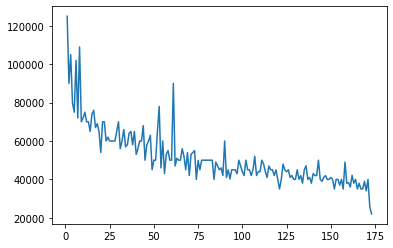

In [30]:
import matplotlib.pyplot as plt

plt.plot(df["Rank"], df["P75th"]);

First, you import the `matplotlib.pyplot` module and rename it `plt`. 

Then, you call `plot()` and pass the "Rank" column of the DataFrame object as the first argument and the "P75th" column as the second argument.

You can create exactly the same plot using the `.plot()` method of the DataFrame object:

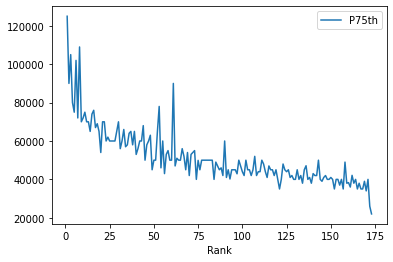

In [31]:
df.plot(x="Rank", y="P75th");

`.plot()` is a **wrapper** for `pyplot.plot()`, and the result is a plot identical to the one produced with Matplotlib.

You can use `pyplot.plot()` and `df.plot()` to produce the same plot from columns of a DataFrame object. 

However, if you already have a DataFrame instance, `df.plot()` offers a cleaner syntax than `pyplot.plot()`.

## A wrapper noted for its elegance: Seaborn

Pandas is not the only wrapper in Matplotlib. Matplotlib provides the basis for creating highly customisable graphics. As a result, there are many Python data visualisation packages that rely on this library. 

Among them, one that is widely used in the scientific community for its simplicity and elegance is `Seaborn`. Seaborn offers graphs with configurations adapted to the common use in scientific communication. 

To use Seaborn, just import it like the other libraries:

In [32]:
import seaborn as sns

## Explore your data with Seaborn

To demonstrate the use of Seaborn, let's explore the US government's National Health and Nutrition Examination Survey (NHANES) database:

In [33]:
!pip install nhanes
from nhanes.load import load_NHANES_data

nhanes_data = load_NHANES_data()
nhanes_data.head()

,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,TypeOfMilkFirstFed1Milk,TypeOfMilkFirstFedFatFreeMilk,TypeOfMilkFirstFedSoyMilk,TypeOfMilkFirstFedOther,HowHealthyIsTheDiet,Past30DayMilkProductConsumption,YouDrinkWholeOrRegularMilk,YouDrink2FatMilk,YouDrink1FatMilk,YouDrinkFatFreeskimMilk,YouDrinkSoyMilk,YouDrinkAnotherTypeOfMilk,RegularMilkUse5TimesPerWeek,HowOftenDrankMilkAge512,HowOftenDrankMilkAge1317,HowOftenDrankMilkAge1835,CommunitygovernmentMealsDelivered,EatMealsAtCommunityseniorCenter,AttendKindergartenThruHighSchool,SchoolServesSchoolLunches,OfTimesweekGetSchoolLunch,SchoolLunchFreeReducedOrFullPrice,SchoolServeCompleteBreakfastEachDay,OfTimesweekGetSchoolBreakfast,SchoolBreakfastFreereducedfullPrice,SummerProgramMealFreereducedPrice,OfMealsNotHomePrepared,OfMealsFromFastFoodOrPizzaPlace,OfReadytoeatFoodsInPast30Days,OfFrozenMealspizzaInPast30Days,HeardOfMyPlate,LookedUpMyPlateOnInternet,TriedMyPlatePlan,MainMealPlannerpreparer,SharedMealPlanningpreparingDuty,MainFoodShopper,SharedFoodShoppingDuty,HaveSeriousDifficultyHearing,HaveSeriousDifficultySeeing,HaveSeriousDifficultyConcentrating,HaveSeriousDifficultyWalking,HaveDifficultyDressingOrBathing,HaveDifficultyDoingErrandsAlone,HowOftenDoYouFeelWorriedOrAnxious,TakeMedicationForTheseFeelings,HowOftenDoYouFeelDepressed,TakeMedicationForDepression,CoveredByHealthInsurance,UsualSleepTimeOnWeekdaysOrWorkdays,UsualWakeTimeOnWeekdaysOrWorkdays,SleepHoursWeekdaysOrWorkdays,HowOftenDoYouSnore,EverToldDoctorHadTroubleSleeping,HowOftenFeelOverlySleepyDuringDay,HaveLittleInterestInDoingThings,FeelingDownDepressedOrHopeless,TroubleSleepingOrSleepingTooMuch,FeelingTiredOrHavingLittleEnergy,PoorAppetiteOrOvereating,FeelingBadAboutYourself,TroubleConcentratingOnThings,MovingOrSpeakingSlowlyOrTooFast,ThoughtYouWouldBeBetterOffDead,DifficultyTheseProblemsHaveCaused,SmokedTobaccoLast5Days,DaysSmokedCigarettesLast5Days,CigarettesSmokedPerDay,UsedAnyTobaccoProductLast5Days,ExperienceConfusionmemoryProblems,PhysicalMentalEmotionalLimitations,DifficultyManagingMoney,60SecHr30SecHr2,60SecPulse30SecPulse2,SystolicBloodPres1StRdgMmHg,DiastolicBloodPres1StRdgMmHg,SystolicBloodPres2NdRdgMmHg,DiastolicBloodPres2NdRdgMmHg,SystolicBloodPres3RdRdgMmHg,DiastolicBloodPres3RdRdgMmHg,EnergyKcal_DR2TOT,ProteinGm_DR2TOT,CarbohydrateGm_DR2TOT,TotalSugarsGm_DR2TOT,DietaryFiberGm_DR2TOT,TotalFatGm_DR2TOT,TotalSaturatedFattyAcidsGm_DR2TOT,TotalMonounsaturatedFattyAcidsGm_DR2TOT,TotalPolyunsaturatedFattyAcidsGm_DR2TOT,CholesterolMg_DR2TOT,AlcoholGm_DR2TOT,WeightKg,RecumbentLengthCm,StandingHeightCm,BodyMassIndexKgm2,WaistCircumferenceCm,DirectHdlcholesterolMgdl,TotalCholesterolMgdl,VigorousWorkActivity,ModerateWorkActivity,WalkOrBicycle,VigorousRecreationalActivities,ModerateRecreationalActivities,MinutesSedentaryActivity,EverBeenToldYouHaveAsthma,DoctorEverSaidYouHadArthritis,EverToldYouHadHeartAttack,AgeWhenToldYouHadHeartAttack,EverToldYouHadAStroke,AgeWhenToldYouHadAStroke,EverToldYouHadCancerOrMalignancy,1StCancerWhatKindWasIt,Age1StCancerMcq230ADiagnosed,EverUsedMarijuanaOrHashish,DaysUsedMarijuanaOrHashishmonth,EverUsedCocaineheroinmethamphetamine,EverUseAnyFormOfCocaine,OfDaysUsedCocainemonth,EverUsedHeroin,OfDaysUsedHeroinmonth,EverUsedMethamphetamine,DaysUsedMethamphetaminemonth,EverBeenInRehabilitationProgram,BloodLeadUgdl,BloodCadmiumUgl,BloodMercuryTotalUgl,BloodSeleniumUgl,BloodManganeseUgl,Gender,AgeInYearsAtScreening,AgeInMonthsAtScreening0To24Mos,RacehispanicOrigin,RacehispanicOriginWNhAsian,ServedActiveDutyInUsArmedForces,EducationLevelChildrenyouth619,EducationLevelAdults20,MaritalStatus,TotalNumberOfPeopleInTheHousehold,TotalNumberOfPeopleInTheFamily,OfChildren5YearsOrYoungerInHh,OfChildren617YearsOldInHh,OfAdults60YearsOrOlderInHh,AnnualHouseholdIncome,AnnualFamilyIncome,RatioOfFamilyIncomeToPoverty,Tru

### Histogramas

Podemos crear un histograma con el método `histplot` disponible en Seaborn:

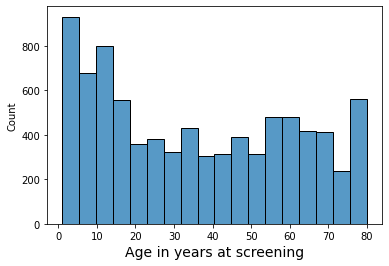

In [38]:
import matplotlib.pyplot as plt

histogram = sns.histplot(x="AgeInYearsAtScreening", data=nhanes_data)
histogram.set_xlabel("Age in years at screening", fontsize=14)
plt.show()

In general, Seaborn's syntax calls for specifying a parameter for the `data` argument and specifying the axes in the `x` and `y` arguments. 

We can customise the graph by using Matplotlib methods such as `set_xlabel` and `set_ylabel` to set the axis titles. At the end we use the `plt.show()` statement to display the graph in our interface. 

### Graphs of two variables

Another common use of visualisation is to examine the relationship between two variables. For example, let's say we wanted to plot average height as a function of age in the NHANES dataset. 

Let's generate this plot with Seaborn:

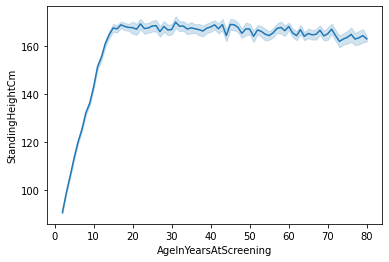

In [39]:
age_and_height = sns.lineplot(
    x="AgeInYearsAtScreening",
    y="StandingHeightCm",
    data=nhanes_data,
)

plt.show()

Seaborn by default gives us the average and confidence interval of the data grouped by age. We see the confidence interval shaded around the line.

We can ask Seaborn to generate a line for men and a line for women on the same graph:

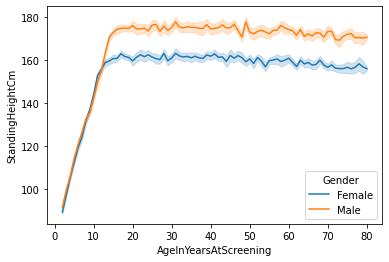

In [40]:
age_and_height = sns.lineplot(
    x="AgeInYearsAtScreening",
    y="StandingHeightCm",
    hue="Gender",
    data=nhanes_data,
)

plt.show()

This was thanks to the `hue` argument, which allows us to group the results according to a third variable, in this case `Gender`.

#### Box plots

An important job of statistical visualisation is to show us the variability or dispersion of our data. We have already seen how to do this using histograms; now let's look at how we can compare distributions.

Let's start with a simple example: comparing the height of adult men and women in the NHANES sample. A commonly used diagram is the box plot (sometimes known as a box-and-whisker plot). 

Let's generate a box plot with Seaborn:

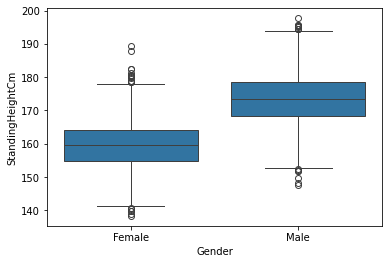

In [42]:
adult_nhanes_data = nhanes_data.query("AgeInYearsAtScreening > 17")
boxplot = sns.boxplot(x="Gender", y="StandingHeightCm", data=adult_nhanes_data)
plt.show()

We were able to generate this graph by calling the `boxplot` function and specifying the basic arguments: `data`, `x` and `y`. 

To work only with the adults, we applied a filter to our database with the `query` method of pandas. 

Another commonly used type of graph is the violin graph, which shows the shape of the entire distribution:

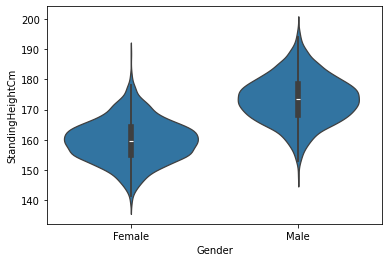

In [43]:
violinplot = sns.violinplot(
    x="Gender", y="StandingHeightCm", data=adult_nhanes_data
)
plt.show()

## Find correlations

Often, you want to see if two columns in a dataset are connected. 

For example, we can explore whether the weight and height of adults are related:

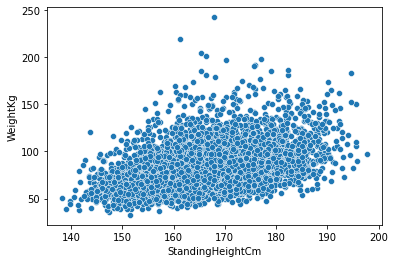

In [44]:
corr_plot = sns.scatterplot(
    x="StandingHeightCm", y="WeightKg", data=adult_nhanes_data
)

plt.show()

With Seaborn, we can order more than one correlation graph at a time:

(To demonstrate this point we will use a smaller database to reduce computating time).

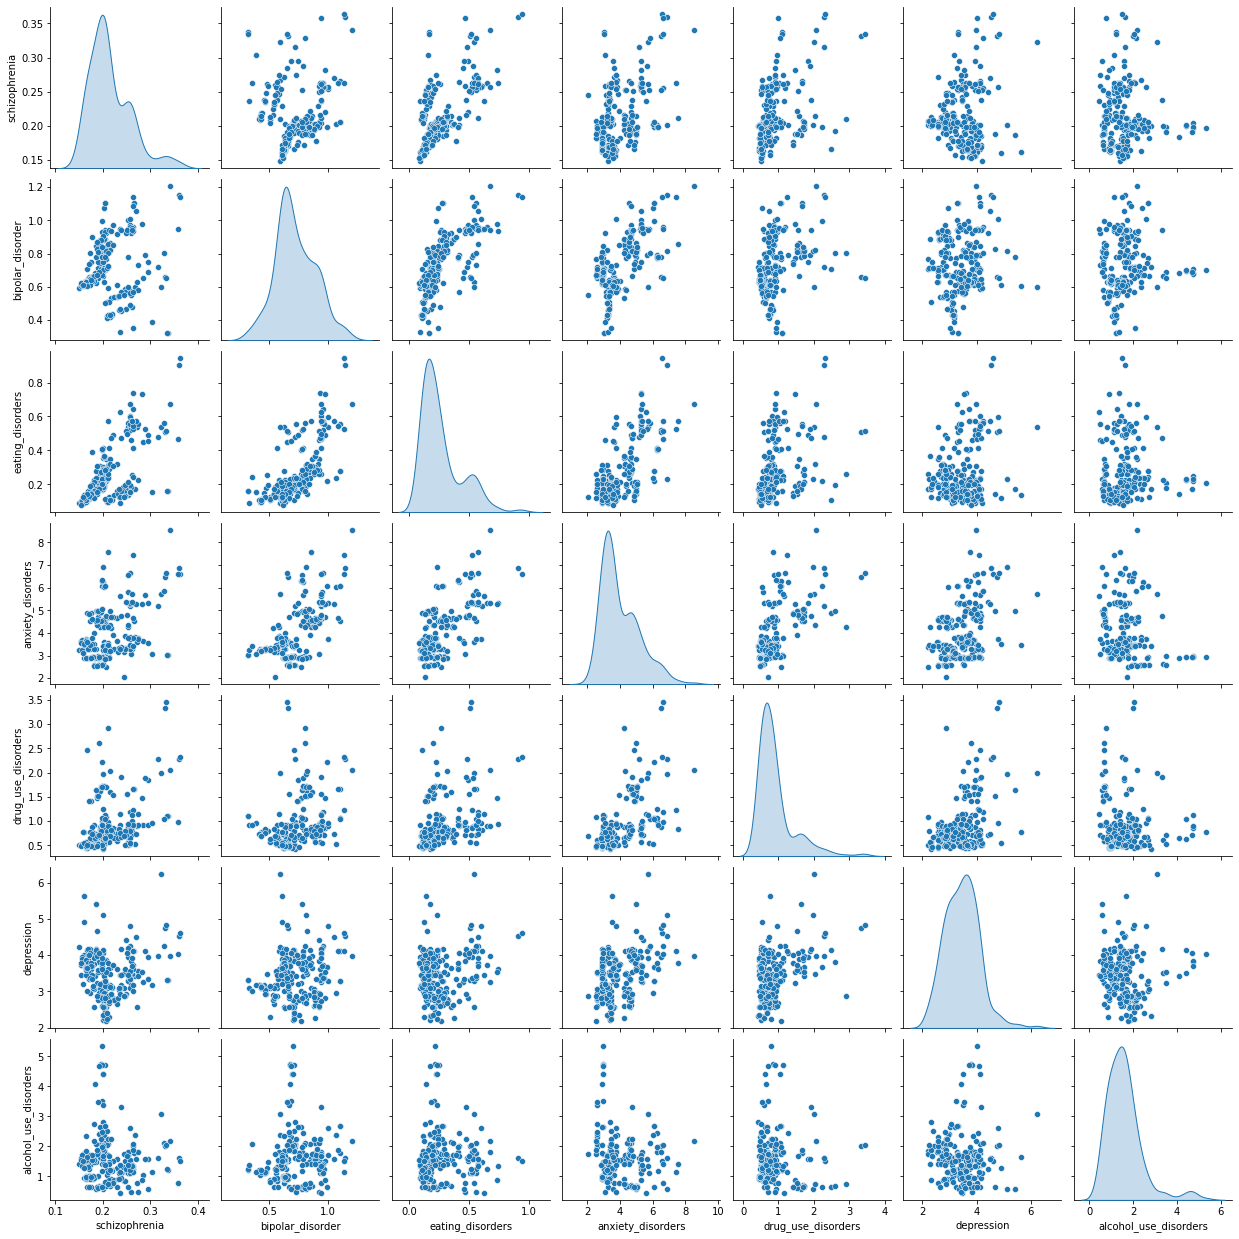

In [45]:
# Cargamos los datos
df_subsdis = pd.read_csv(
    "https://raw.githubusercontent.com/renatoparedes/IntroPythonInvestigacionPsicologia/master/AnalisisdeDatosCuantitativos/depression-data-subsdis.csv"
)
df_subsdis.drop(columns=["year"], inplace=True)

# Generamos el gráfico
sns.pairplot(df_subsdis, diag_kind="kde")
plt.show()

## Global configurations

Seaborn offers the possibility of setting global configurations for all the plots you generate within the same document (notebook/script). This ranges from the size of the axis titles to the colour palette to be used. 

The following is a common configuration for academic articles:

In [54]:
# Seaborn config
sns.set_context("paper")
sns.set_theme(
    style="ticks",
    palette="gray",
    rc={"axes.labelsize": 14, "axes.labelweight": "bold"},
)

For more details, you can read the official [Seaborn documentation](https://seaborn.pydata.org/tutorial.html).